# Global economy faces gravest threat since the crisis as coronavirus spreads

In [1]:
#!conda install -c conda-forge wordcloud

In [46]:
import pandas as pd
import lxml.html
import requests

In [47]:
res = requests.get('https://en.wikipedia.org/wiki/Coronavirus_disease_2019')

In [48]:
root = lxml.html.fromstring(res.text)
root

<Element html at 0x2021534fea8>

In [49]:
content = root.cssselect('[class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject page-Coronavirus_disease_2019 rootpage-Coronavirus_disease_2019 skin-vector action-view"]')[0].text_content()
content

'\n\n\n\n\t\n\t\t\n\t\n\n\n\n\tCoronavirus disease 2019\n\t\n\t\n\t\tFrom Wikipedia, the free encyclopedia\n\t\t\n\t\t\n\t\t\n\t\t\n\t\tJump to navigation\n\t\tJump to search\n\t\tViral respiratory disease first detected in December 2019\nThis article is about the disease. For the virus, see Severe acute respiratory syndrome coronavirus 2. For the pandemic, see 2019–20 coronavirus pandemic.\n\n\n\n\nCoronavirus disease 2019 (COVID-19)Other names\nCoronavirus\nCOVID\n2019-nCoV acute respiratory disease\nNovel coronavirus pneumonia[1][2]\nSymptoms of COVID-19Pronunciation/kəˈroʊnəˌvaɪrəs dɪˈziːz//ˌkoʊvɪdnaɪnˈtiːn, ˌkɒvɪd-/[3] SpecialtyInfectious diseaseSymptomsFever, cough, shortness of breath, loss of smell, none[4][5][6]ComplicationsPneumonia, viral sepsis, acute respiratory distress syndrome, kidney failure.Usual onset2–14 days (typically 5) from infectionCausesSevere acute respiratory syndrome coronavirus 2 (SARS-CoV-2)Risk factorsTravel, viral exposureDiagnostic methodrRT-PCR testin

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [51]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[2, 7, 1, ..., 1, 1, 1]], dtype=int64)

In [52]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})
df

,word,freq
0,00,2
1,000,7
2,0000000000000270,1
3,0000000000000744,1
4,00016,2
...,...,...
5499,客家語,1
5500,국내,1
5501,발생현황,1
5502,브리핑,1


In [53]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
317,2020,671
3437,march,304
274,19,302
1819,covid,264
1792,coronavirus,216
4404,retrieved,196
1147,april,190
81,10,178
2079,doi,139
2047,disease,137


In [54]:
from wordcloud import WordCloud

In [55]:
wc = WordCloud(width=400, height=400, background_color='white')
#wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [56]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [57]:
wc.fit_words(frequencies)

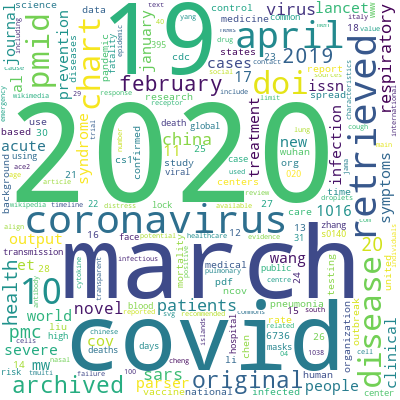

In [58]:
wc.to_image()